In [1]:
# importing  all the functions defined in roster_functions.py
from roster_functions_GPU import *

In [2]:
include_columns = ['Year','overallPct','FPI_rank','SOS_rank','avgHeight','avgWeight','numPositions',
                   'numC','numCB','numDB','numDE','numDL','numDT','numK','numLB','numLS','numOG','numOL',
                   'numOT','numP','numQB','numRB','numS','numTE','numWR','numOffense','numDefense',
                   'numFreshmen','numSophomores','numJuniors','numSeniors','numPlayers','class_natlRank',
                   'class_confRank','class_score','numGrad','numRedshirtFreshmen','numRedshirtSophomores',
                   'numRedshirtJuniors','numRedshirtSeniors','numRedshirting']

data = load_data_includeCols('data/Duke Roster and Performance Data - v2.csv', include_columns)

refined_data = meanImpute(data)
print(refined_data.head())

     Year  overallPct  FPI_rank  SOS_rank  avgHeight   avgWeight  \
0  2023.0    0.615385      29.0      49.0   6.141892  227.477477   
1  2022.0    0.692308      45.0      89.0   6.135886  227.063063   
2  2021.0    0.250000     113.0      77.0   6.176991  225.946903   
3  2020.0    0.181818      99.0      44.0   6.206271  231.435644   
4  2019.0    0.416667      64.0      48.0   6.172068  229.814815   

   numPositions  numC  numCB  numDB  ...  numPlayers  class_natlRank  \
0          15.0   0.0   10.0    0.0  ...       111.0            60.0   
1          13.0   0.0    0.0   20.0  ...       111.0            57.0   
2          15.0   5.0   10.0    0.0  ...       113.0            55.0   
3          15.0   5.0    6.0    0.0  ...       101.0            57.0   
4          15.0   3.0    7.0    0.0  ...       108.0            48.0   

   class_confRank  class_score  numGrad  numRedshirtFreshmen  \
0            10.0        85.07     24.0                 12.0   
1            10.0        85.12

In [3]:
target = 'overallPct'

X, y = defineXY(refined_data, target)

seed = 42

X_train, X_test, y_train, y_test = splitTrainingTesting(X, y, 0.15, seed)
X_train_PCA, X_test_PCA = performPCA_separateSets(X_train, X_test, 8, seed)

Fitting 16 folds for each of 1 candidates, totalling 16 fits
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 8
[LightGBM] [Info] Start training from score 0.371384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

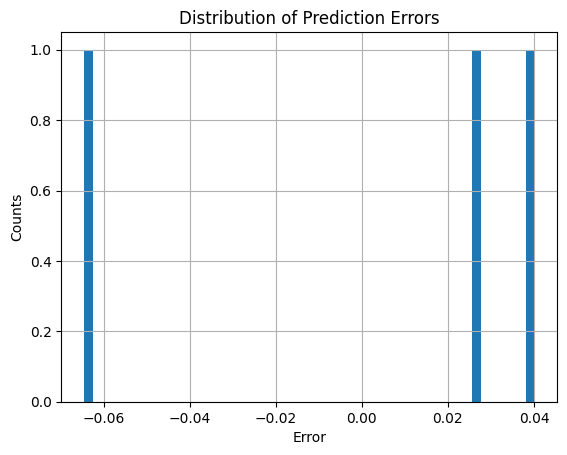


Importance of each feature used in the model:
FPI_rank: 861
Year: 610
numPositions: 385
SOS_rank: 349
numCB: 317
avgWeight: 314
numC: 311
avgHeight: 250


Correlation matrix of the dataframe, showing the Pearsoncorrelation coefficients between each pair of features:
overallPct               1.000000
FPI_rank                 0.891757
numPlayers               0.691230
numRedshirtJuniors       0.638865
numDE                    0.620924
numOffense               0.612840
numRedshirtSeniors       0.596286
class_score              0.580181
SOS_rank                 0.571728
numRB                    0.566424
numDefense               0.552128
Year                     0.538425
numWR                    0.487801
numOL                    0.450299
numC                     0.449515
numJuniors               0.428005
numRedshirtSophomores    0.417524
numLB                    0.397348
numLS                    0.396853
numSeniors               0.351348
numSophomores            0.345275
numS              

In [4]:
# params = hypertune_model_xgb(X_train_PCA, y_train, seed)
params = hypertune_model_lightGBM(X_train_PCA, y_train, seed)
# params = {'bootstrap': True, 'max_features': 'sqrt'}

# model = createXGBoost(X_train_PCA, X_test_PCA, y_train, y_test, params, seed)
model = createLightGBM(X_train_PCA, X_test_PCA, y_train, y_test, params, seed)
model

allFeatureStats(model, refined_data, X, X_train_PCA, y_train, target)

In [5]:
data_2024 = load_data_includeCols('data/Duke Roster and Performance Data - 2024.csv', include_columns)

print(data_2024.head())

target = 'overallPct'
X_2024, y_2024 = defineXY(data_2024, target)
# Preprocess the new data similarly to how you did for the training data
scaler = StandardScaler()
# Fit the scaler on the entire training data before and transform the new data
X_2024_scaled = scaler.fit_transform(X)

# print(X_2024_scaled)

# Example of applying PCA (assuming you used PCA)
pca = PCA(n_components=8, random_state=seed)
# Fit the PCA on the entire training data before and transform the new data
X_2024_PCA = pca.fit_transform(X_2024_scaled)

# Load the trained model (if saved to a file)
# model = lgb.Booster(model_file='model.txt')

# Assuming you have the trained model in memory
# Make predictions
predictions = model.predict(X_2024_PCA)

print("Predicted value:", predictions[0])

   Year  overallPct  FPI_rank  SOS_rank  avgHeight   avgWeight  numPositions  \
0  2024         NaN        52        61   6.118217  219.569767            15   

   numC  numCB  numDB  ...  numPlayers  class_natlRank  class_confRank  \
0     0      7      0  ...          86              60              14   

   class_score  numGrad  numRedshirtFreshmen  numRedshirtSophomores  \
0        85.75        9                   19                     10   

   numRedshirtJuniors  numRedshirtSeniors  numRedshirting  
0                   6                   3               0  

[1 rows x 41 columns]
Predicted value: 0.7320671502195097


In [6]:
from sklearn.utils import resample

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Store predictions
bootstrap_predictions = []

# Perform bootstrapping with randomized seeds
for _ in range(n_bootstrap_samples):
    # Generate a random seed
    random_seed = np.random.randint(0, 10000)

    target = 'overallPct'

    X, y = defineXY(refined_data, target)

    X_train, X_test, y_train, y_test = splitTrainingTesting(X, y, 0.15, random_seed)
    X_train_PCA, X_test_PCA = performPCA_separateSets(X_train, X_test, 8, random_seed)

    # Resample the training data
    X_resampled, y_resampled = resample(X_train_PCA, y_train, random_state=random_seed)

    # Train the model on resampled data with the random seed
    model = lgb.LGBMRegressor(random_state=random_seed, num_threads=6, force_col_wise=True, **params)
    model.fit(X_resampled, y_resampled)
    
    # Predict the new data
    pred = model.predict(X_2024_PCA)
    bootstrap_predictions.append(pred)

# Convert to numpy array for easier calculations
bootstrap_predictions = np.array(bootstrap_predictions)

# Calculate the mean prediction
mean_prediction = np.mean(bootstrap_predictions, axis=0)

# Calculate the standard deviation (as a measure of the margin of error)
std_prediction = np.std(bootstrap_predictions, axis=0)

# Assuming a 95% confidence interval
margin_of_error = 1.96 * std_prediction

print("Mean Predicted value:", mean_prediction[0])
print("Margin of error:", margin_of_error[0])
print(f"95% Confidence Interval: ({mean_prediction[0] - margin_of_error[0]}, {mean_prediction[0] + margin_of_error[0]})")

[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 16, number of used features: 8
[LightGBM] [Info] Start training from score 0.450664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[